# Proyecto Y.Afisha

Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

1. registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
2. un archivo con los pedidos en este periodo;
3. estadísticas de gastos de marketing.

Lo que vas a investigar:

1. cómo los clientes usan el servicio;
2. cuándo empiezan a comprar;
3. cuánto dinero aporta cada cliente a la compañía;
4. cuándo los ingresos cubren el costo de adquisición de los clientes.

## Descarga los datos y prepáralos para el análisis

### Optimización de datos

#### Descarga de librerías y archivos

In [1]:
#importamos las librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Descargaremos una parte de los datos de cada archivo para estudiarlos, modificar al tipo de datos más eficiente (eliminando los tipos object posibles) y optimizarlos para que ocupen menos espacio.

In [2]:
#Descargamos las primeras 200 filas de nuestros archivos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

#### Optimización de visits

In [3]:
#Analizamos los datos y conocemos el tamaño exacto
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
#Visualizaremos columna por columna
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
#Debido a que nos encontramos solo con dos respuestas en esta fila, podemo concluir que son categorías, así que cambiamos de object a categorías
visits['Device'] = visits['Device'].astype('category')

In [6]:
#Moficamos las columnas de fechas a datetime
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [7]:
#Verificamos cuanto cambió el tamaño de nuestra tabla con las modificaciones
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


De 79.3 MB ahora nuestra tabla muestra cuenta con solo 11.3 MB.

#### Optimización de orders

In [8]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


Visualizaremos los datos para identificar si podemos cambiar el tipo object

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
#Corregimos el tipo de datos en Buy Ts y cargamos todo el archivo
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [11]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### Optimización de costs

In [12]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [13]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [14]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")

In [15]:
costs.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


#### Análisis de duplicados

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

No encontramos filas duplicadas y el método info aplicado anteriormente nos muestra que tampoco hay valores nulos.

## Haz informes y calcula métricas 

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?


In [19]:
#Haremos un truncamiento en los periodos por día, semana y mes
visits['day'] = visits["Start Ts"].dt.to_period("D").dt.start_time
visits['week'] = visits["Start Ts"].dt.to_period("W").dt.start_time
visits['month'] = visits["Start Ts"].dt.to_period("M").dt.start_time
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01


In [20]:
visits_per_day = visits.groupby('day')['Uid'].nunique()
print("Visitas por día:")
round(visits_per_day.mean())

Visitas por día:


908

<AxesSubplot:xlabel='day'>

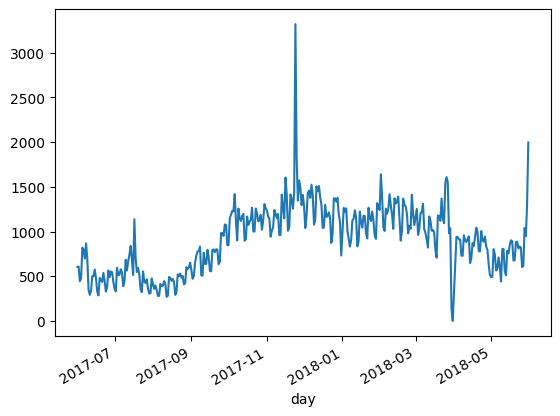

In [21]:
visits_per_day.plot(kind="line") 

In [22]:
visits_per_week = visits.groupby('week')['Uid'].nunique()
print("Visitas por semana:")
round(visits_per_week.mean())

Visitas por semana:


5716

<AxesSubplot:xlabel='week'>

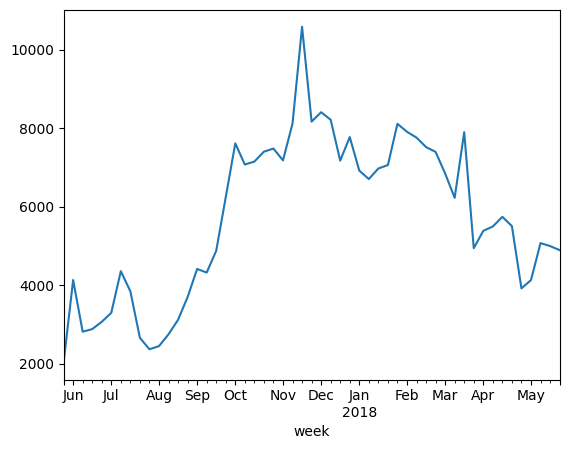

In [23]:
visits_per_week.plot(kind="line") 

In [24]:
visits_per_month = visits.groupby('month')['Uid'].nunique()
print("Visitas por mes:")
round(visits_per_month.mean())

Visitas por mes:


23228

<AxesSubplot:xlabel='month'>

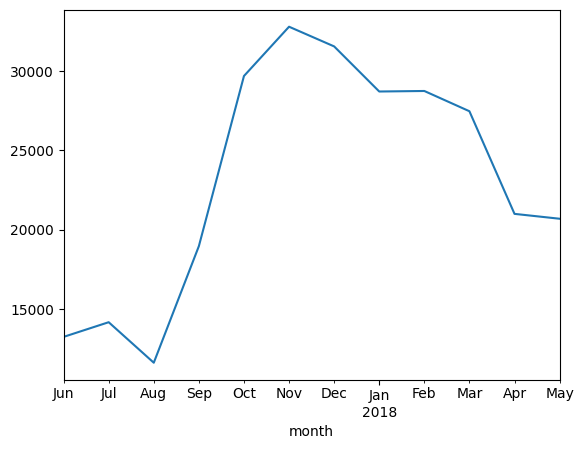

In [25]:
visits_per_month.plot(kind="line") 

Al día tenemos un promedio de 908 personas que visitan, a la semana 5716 y al mes 23228.

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).


In [26]:
sessions_per_day = visits.groupby('day')['Uid'].count()

print(f"Hay un aproximado de: {round(sessions_per_day.mean())} sesiones al día")


Hay un aproximado de: 987 sesiones al día


#### ¿Cuál es la duración de cada sesión?

In [27]:
#Creamos una nueva columna con la diferencia entre el inicio de sesión y el cierre de sesión para saber la duración en segundos
visits['duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['duration'].describe(percentiles = [0.25, 0.50, 0.75, 0.90])

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
90%        1620.000000
max       84480.000000
Name: duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

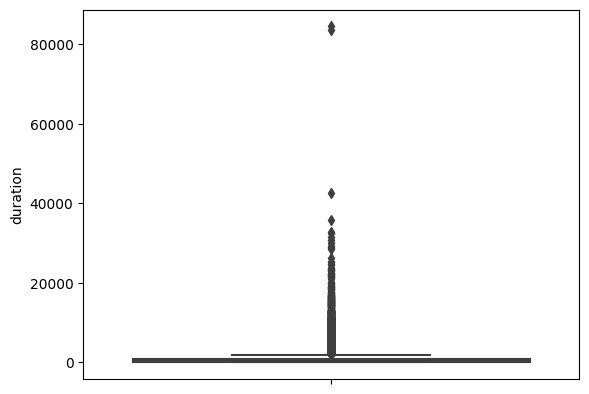

In [28]:
import seaborn as sns
sns.boxplot(data=visits, y='duration')
plt.show

<AxesSubplot:>

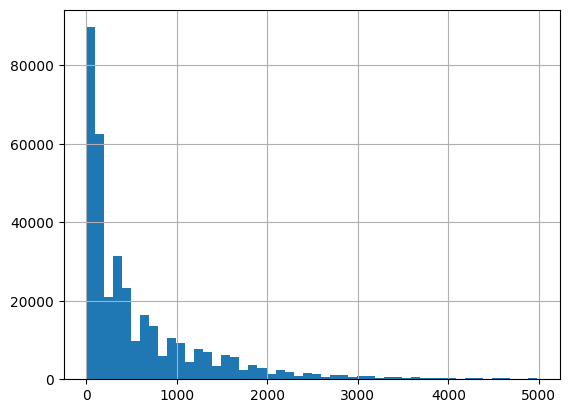

In [29]:
#Debido a que hay un valores que son demasiado altos y afectarán nuestro histograma, los filtraremos 
visits.query('duration < 5000')['duration'].hist(bins=50)

In [30]:
print(f"La duración promedio de cada sesión es de: {round((visits.query('duration < 5000')['duration'].mean())/60)} minutos")

La duración promedio de cada sesión es de: 10 minutos


#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [31]:
#Estableceremos la primer visita de cada usuario agrupando una fila por cada usuario
first_visit = (
    visits
    .sort_values('Start Ts')
    .groupby('Uid')
    .head(1)
    .rename(columns={'month': 'first_month'}))
first_visit.head()

,Device,End Ts,Source Id,Start Ts,Uid,day,week,first_month,duration
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-05-29,2017-06-01,60
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-05-29,2017-06-01,0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-05-29,2017-06-01,840
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-05-29,2017-06-01,0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,120


In [32]:
#Realizamos un análisis de cohortes
visits_cohorts = pd.merge(
    visits,
    first_visit[['Uid', 'first_month']],
    on = 'Uid')

#agregamos una nueva columna para considerar la "edad" de los usuarios con respecto al mes de su primer visita
visits_cohorts['visit_age'] =(visits_cohorts['month'].dt.month - visits_cohorts['first_month'].dt.month)
#para evitar tener valores enteros, agregamos el factor años
visits_cohorts['visit_age'] += 12*(visits_cohorts['month'].dt.year - visits_cohorts['first_month'].dt.year)


visits_cohorts.head()

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,duration,first_month,visit_age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-05,2018-03-01,1680,2018-03-01,0


In [33]:
visits_cohorts['visit_age'].value_counts()

0     267858
1      23294
2      14833
3      11961
4       9977
5       8497
6       6834
7       5290
8       4009
9       3036
10      2193
11      1618
Name: visit_age, dtype: int64

In [34]:
#Crearemos una pivot table
visits_retention = visits_cohorts.pivot_table(
    index='first_month',
    columns='visit_age',
    values='Uid',
    aggfunc='nunique')

visits_retention.fillna('')

visit_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


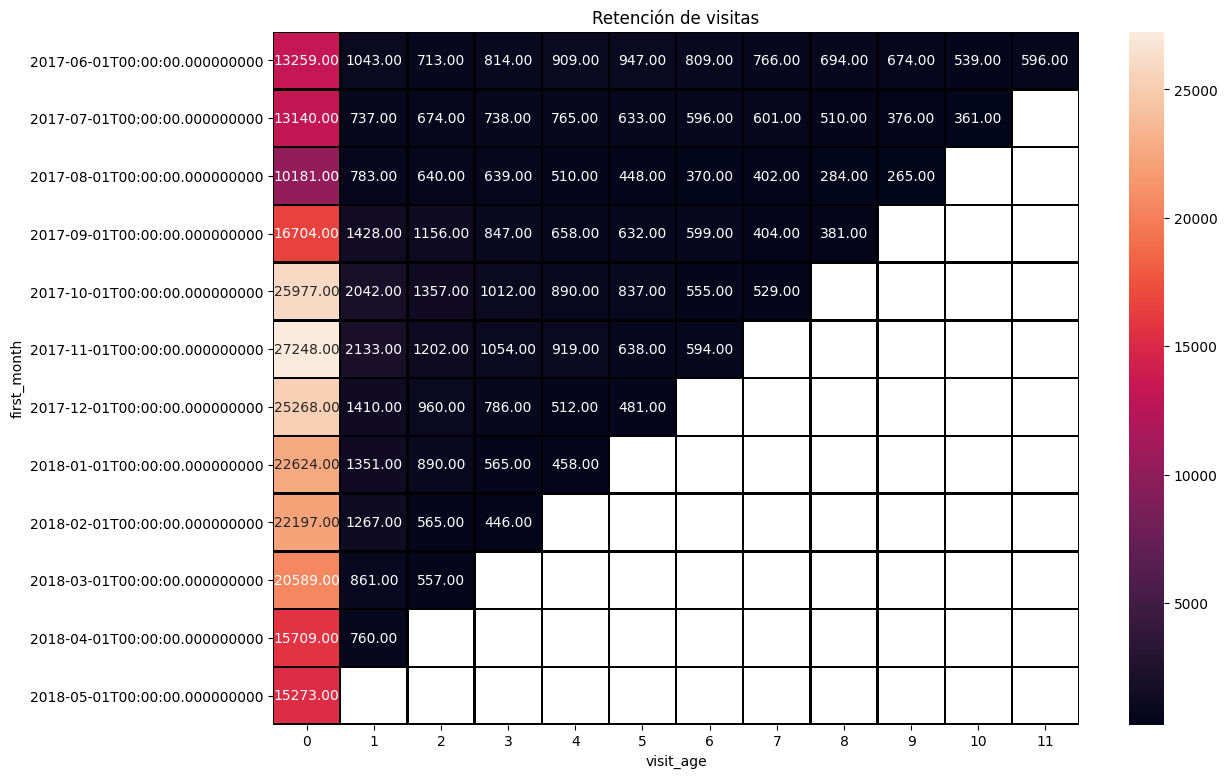

In [36]:
#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(visits_retention, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.title('Retención de visitas')
plt.show()

In [37]:
#Calculamos el indice de retención
#Creamos una copia
vr_rate = visits_retention.copy()

#iteramos para dividir los valores entre la primer columna
for col in vr_rate.columns:
    vr_rate[col] = (vr_rate[col]/visits_retention[0])*100
    
vr_rate.fillna('')


visit_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,100.0,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.08334,4.065163,4.49506
2017-07-01,100.0,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.57382,3.881279,2.861492,2.747336,
2017-08-01,100.0,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.78951,2.602888,,
2017-09-01,100.0,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,,,
2017-10-01,100.0,7.8608,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,,,,
2017-11-01,100.0,7.828097,4.411333,3.868174,3.372725,2.341456,2.179977,,,,,
2017-12-01,100.0,5.58018,3.799272,3.110654,2.026278,1.903593,,,,,,
2018-01-01,100.0,5.971535,3.933876,2.497348,2.024399,,,,,,,
2018-02-01,100.0,5.707979,2.545389,2.009281,,,,,,,,


In [38]:
#Calculamos la retención en comparación con el segundo més
print(f"La tasa de retención de usuarios en un mes es: {round(vr_rate[1].mean())} %")


La tasa de retención de usuarios en un mes es: 7 %


### Ventas

#### ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).


In [39]:
#Creamos columnas para días, semanas y meses
orders['day'] = orders["Buy Ts"].dt.to_period("D").dt.start_time
orders['week'] = orders["Buy Ts"].dt.to_period("W").dt.start_time
orders['month'] = orders["Buy Ts"].dt.to_period("M").dt.start_time
orders.head()

,Buy Ts,Revenue,Uid,day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [40]:
first_order = (
    orders
    .sort_values('Buy Ts')
    .groupby('Uid')
    .head(1)
    .rename(columns={'month': 'first_order_month'}))
first_order.head()

,Buy Ts,Revenue,Uid,day,week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [41]:
#Calculamos la tasa de conversión
conversion = pd.merge(
    first_order[['Uid', "Buy Ts", 'first_order_month']],
    first_visit[['Uid', 'Start Ts', 'first_month', 'Source Id']]).rename(columns={'Source Id': 'source_id'})

conversion['time_change'] = conversion['Buy Ts'] - conversion['Start Ts']
conversion['time_change'] /= np.timedelta64(1, 'h')

conversion.head(2)

,Uid,Buy Ts,first_order_month,Start Ts,first_month,source_id,time_change
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.183333


In [42]:
users = len(conversion)

c_0d = round((sum(conversion['time_change']<24)/users)*100)
c_1d = round((sum(conversion['time_change']<48)/users)*100)
c_2d = round((sum(conversion['time_change']<72)/users)*100)
c_3d = round((sum(conversion['time_change']<96)/users)*100)
c_1w = round((sum(conversion['time_change']<192)/users)*100)
c_2w = round((sum(conversion['time_change']<360)/users)*100)
c_1m = round((sum(conversion['time_change']<720)/users)*100)
c_2m = round((sum(conversion['time_change']<1440)/users)*100)
c_3m = round((sum(conversion['time_change']<2160)/users)*100)
c_6m = round((sum(conversion['time_change']<4320)/users)*100)
c_1y = round((sum(conversion['time_change']<8760)/users)*100)

print(f"""
Conversion 0d: {c_0d} %
Conversion 1d: {c_1d} %
Conversion 2d: {c_2d} %
Conversion 3d: {c_3d} %
Conversion 1w: {c_1w} %
Conversion 2w: {c_2w} %
Conversion 1m: {c_1m} %
Conversion 2m: {c_2m} %
Conversion 3m: {c_3m} %
Conversion 6m: {c_6m} %
Conversion 1y: {c_1y} %
""")


Conversion 0d: 72 %
Conversion 1d: 75 %
Conversion 2d: 76 %
Conversion 3d: 78 %
Conversion 1w: 81 %
Conversion 2w: 83 %
Conversion 1m: 86 %
Conversion 2m: 90 %
Conversion 3m: 93 %
Conversion 6m: 98 %
Conversion 1y: 100 %



<AxesSubplot:>

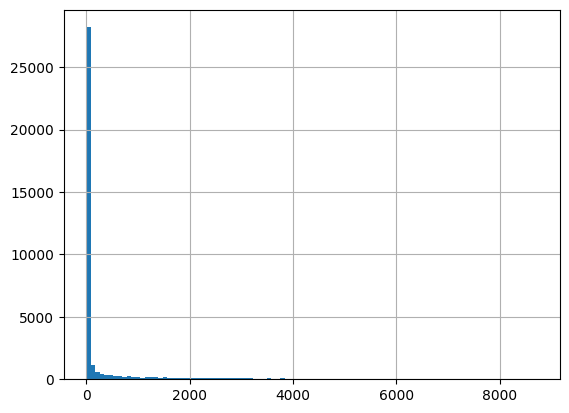

In [43]:
#Visualizaremos las conversiones con una gráfica
conversion['time_change'].hist(bins=100)

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [44]:
#Agrupamos por periodo de tiempo, realizamos un conteo y promediamos
orders_per_day = round(orders.groupby('day')['Buy Ts'].count().mean())
print(f" Al día se realizan un aproximado de {orders_per_day} pedidos")

orders_per_week = round(orders.groupby('week')['Buy Ts'].count().mean())
print(f" A la semana se realizan un aproximado de {orders_per_week} pedidos")

orders_per_month = round(orders.groupby('month')['Buy Ts'].count().mean())
print(f" Al mes se realizan un aproximado de {orders_per_month} pedidos")

 Al día se realizan un aproximado de 139 pedidos
 A la semana se realizan un aproximado de 951 pedidos
 Al mes se realizan un aproximado de 3878 pedidos


#### ¿Cuál es el tamaño promedio de compra?


In [45]:
#Agrupamos por periodo de tiempo, realizamos un conteo y promediamos
revenue_per_day = round(orders.groupby('day')['Revenue'].count().mean())
print(f" El tamaño promedio de compra al día es de: {revenue_per_day}")

revenue_per_week = round(orders.groupby('week')['Revenue'].count().mean())
print(f" El tamaño promedio de compra a la semana es de: {revenue_per_week}")

revenue_per_month = round(orders.groupby('month')['Revenue'].count().mean())
print(f" El tamaño promedio de compra al mes es de: {revenue_per_month}")

 El tamaño promedio de compra al día es de: 139
 El tamaño promedio de compra a la semana es de: 951
 El tamaño promedio de compra al mes es de: 3878


#### ¿Cuánto dinero traen? (LTV)

In [46]:
conversion.head()

,Uid,Buy Ts,first_order_month,Start Ts,first_month,source_id,time_change
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.183333
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2,0.033333
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.250000
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00,2017-06-01,3,0.450000


In [47]:
#Creamos una columna de cohortes basados en la primera compra y la fuente
conversion['cohorte'] = conversion['first_order_month'].astype(str)

#unimos las tablas de conversión con orders
orders = orders.merge(conversion[['Uid', 'cohorte', 'source_id']], on='Uid')

# Calcular los ingresos totales por cohorte y fuente de anuncio
ingresos_cohorte_fuente = orders.groupby(['cohorte', 'source_id'])['Revenue'].sum().reset_index()
ingresos_cohorte_fuente.columns = ['cohorte', 'source_id', 'total_revenue']

data = ingresos_cohorte_fuente.pivot_table(
    index='cohorte', 
    columns='source_id', 
    values='total_revenue', 
    aggfunc='sum')

data

source_id,1,2,3,4,5,7,9,10
cohorte,,,,,,,,
2017-06-01,6392.39,3915.26,3640.32,4992.67,4377.64,NaN,472.15,241.26
2017-07-01,3342.52,2357.57,3761.04,3246.62,2867.87,NaN,366.18,186.12
2017-08-01,2110.91,1022.69,2067.99,2188.71,3644.09,1.22,361.44,209.21
2017-09-01,2364.55,5901.31,5379.30,4547.55,15415.76,NaN,841.22,226.63
2017-10-01,2850.08,4952.99,6589.65,6024.99,5705.10,NaN,885.16,595.48
2017-11-01,3295.77,3868.50,6067.78,7951.94,3607.99,NaN,656.32,650.69
2017-12-01,1837.71,14111.49,6240.99,6284.66,4097.47,NaN,574.69,338.73
2018-01-01,1672.31,2261.35,4588.67,4219.05,3363.70,NaN,265.12,292.93
2018-02-01,1683.90,1946.47,4637.69,4708.50,3030.74,NaN,424.18,319.02


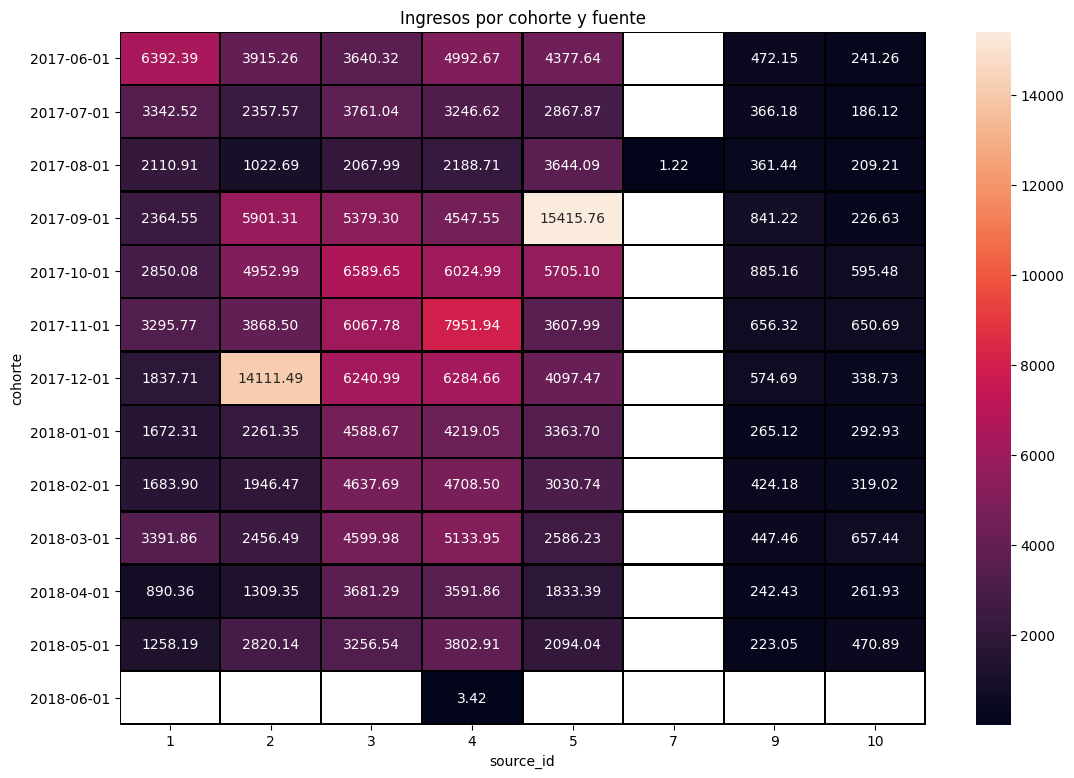

In [54]:
#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(data, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.title('Ingresos por cohorte y fuente')
plt.show()

In [50]:
#Calculamos el numero de usuarios
users = orders.groupby(['cohorte', 'source_id'])['Uid'].nunique().reset_index()
users.columns = ['cohorte', 'source_id', 'unique_users']

#Visualizamos el numero de usuarios por fuente y por cohorte
users_pivot = users.pivot_table(
    index='cohorte', 
    columns='source_id', 
    values='unique_users', 
    aggfunc='sum')

users_pivot

source_id,1,2,3,4,5,7,9,10
cohorte,,,,,,,,
2017-06-01,190.0,235.0,638.0,413.0,384.0,NaN,68.0,95.0
2017-07-01,160.0,208.0,512.0,517.0,423.0,NaN,52.0,51.0
2017-08-01,113.0,123.0,337.0,338.0,360.0,1.0,61.0,37.0
2017-09-01,227.0,221.0,781.0,590.0,589.0,NaN,87.0,86.0
2017-10-01,340.0,396.0,1152.0,1172.0,945.0,NaN,126.0,209.0
2017-11-01,324.0,398.0,1216.0,1177.0,693.0,NaN,145.0,128.0
2017-12-01,331.0,381.0,1317.0,1377.0,771.0,NaN,121.0,85.0
2018-01-01,238.0,292.0,1006.0,1032.0,633.0,NaN,80.0,92.0
2018-02-01,275.0,293.0,1092.0,1106.0,678.0,NaN,84.0,123.0


In [51]:
#Debido a que no tenemos especificado un margen de beneficio, continuamos con el cálculo  del LTV
LVT = data / users_pivot

LVT

source_id,1,2,3,4,5,7,9,10
cohorte,,,,,,,,
2017-06-01,33.644158,16.660681,5.705831,12.088789,11.400104,NaN,6.943382,2.539579
2017-07-01,20.890750,11.334471,7.345781,6.279729,6.779835,NaN,7.041923,3.649412
2017-08-01,18.680619,8.314553,6.136469,6.475473,10.122472,1.22,5.925246,5.654324
2017-09-01,10.416520,26.702760,6.887708,7.707712,26.172767,NaN,9.669195,2.635233
2017-10-01,8.382588,12.507551,5.720182,5.140776,6.037143,NaN,7.025079,2.849187
2017-11-01,10.172130,9.719849,4.989951,6.756109,5.206335,NaN,4.526345,5.083516
2017-12-01,5.551994,37.038031,4.738793,4.564023,5.314488,NaN,4.749504,3.985059
2018-01-01,7.026513,7.744349,4.561302,4.088227,5.313902,NaN,3.314000,3.184022
2018-02-01,6.123273,6.643242,4.246969,4.257233,4.470118,NaN,5.049762,2.593659


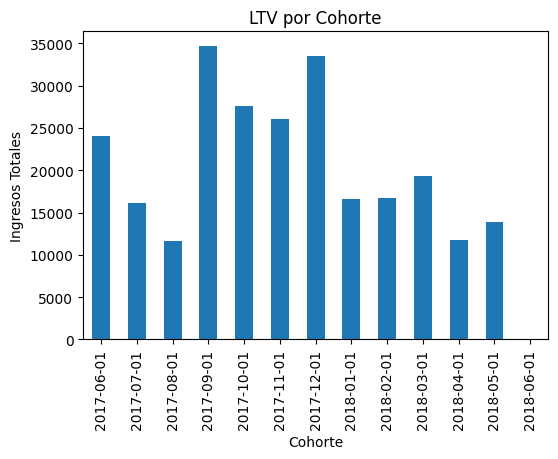

In [52]:
# Graficar LTV por Cohorte
plt.figure(figsize=(6, 4))
data.sum(axis=1).plot(kind='bar')
plt.title('LTV por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Ingresos Totales')
plt.show()

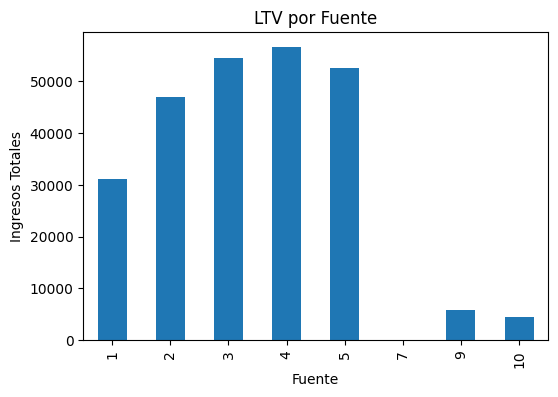

In [53]:
# Graficar LTV por Fuente
plt.figure(figsize=(6, 4))
data.sum(axis=0).plot(kind='bar')
plt.title('LTV por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Ingresos Totales')
plt.show()

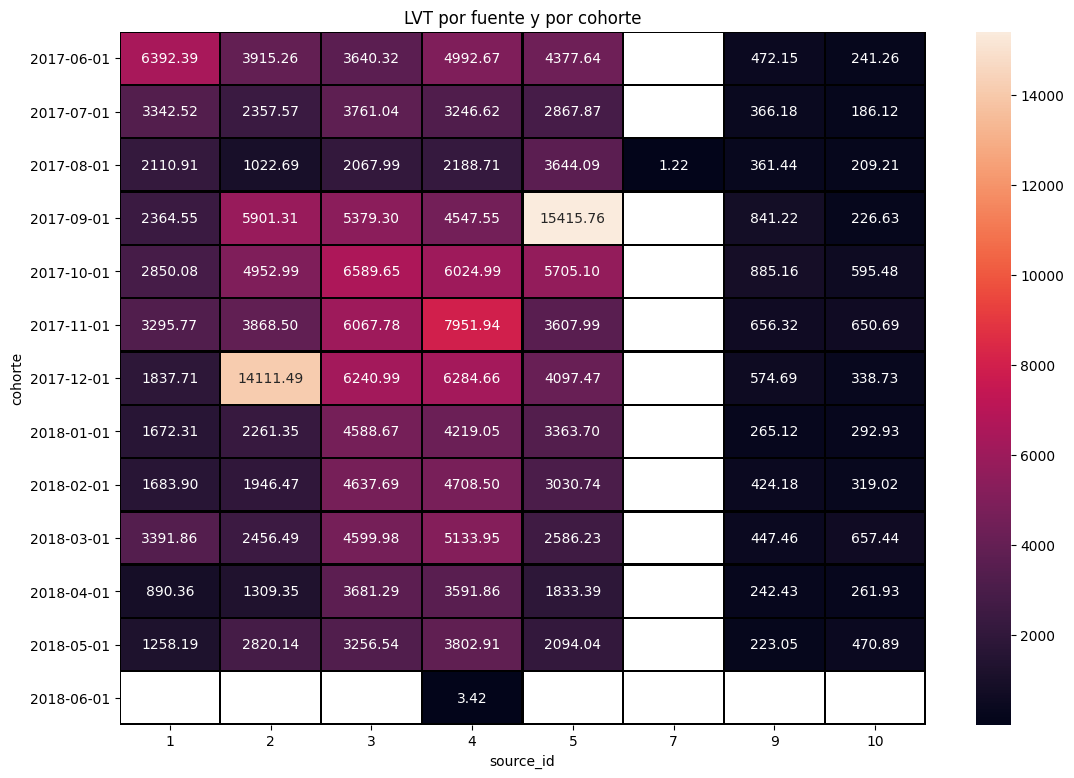

In [55]:
#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(data, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.title('LVT por fuente y por cohorte')
plt.show()

### Marketing

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)


In [56]:
costs['day'] = costs["dt"].dt.to_period("D").dt.start_time
costs['week'] = costs["dt"].dt.to_period("W").dt.start_time
costs['month'] = costs['dt'].dt.to_period('M').dt.start_time

costs.head()

,source_id,dt,costs,day,week,month
0,1,2017-06-01,75.20,2017-06-01,2017-05-29,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-05-29,2017-06-01
2,1,2017-06-03,36.53,2017-06-03,2017-05-29,2017-06-01
3,1,2017-06-04,55.00,2017-06-04,2017-05-29,2017-06-01
4,1,2017-06-05,57.08,2017-06-05,2017-06-05,2017-06-01


In [57]:
daily_cost = (costs.groupby(['day', 'source_id'])['costs'].sum().reset_index())
print(f"El costo diario fue de: {daily_cost['costs'].mean()}")

El costo diario fue de: 129.47742722265932


In [58]:
# Crear una columna de cohorte basado en la fecha de la campaña y la fuente de anuncio
costs['cohorte'] = costs['month'].astype(str)

# Calcular los gastos totales por cohorte y fuente de anuncio
costs_cohorte_fuente = costs.groupby(['cohorte', 'source_id'])['costs'].sum().reset_index()
costs_cohorte_fuente.columns = ['cohorte', 'source_id', 'total_costs']

costs_cohorte_fuente_pivot = costs_cohorte_fuente.pivot_table(
    index='cohorte', 
    columns='source_id', 
    values='total_costs', 
    aggfunc='sum')

#Visualizamos los costos por fuente y por cohorte
costs_cohorte_fuente_pivot

source_id,1,2,3,4,5,9,10
cohorte,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


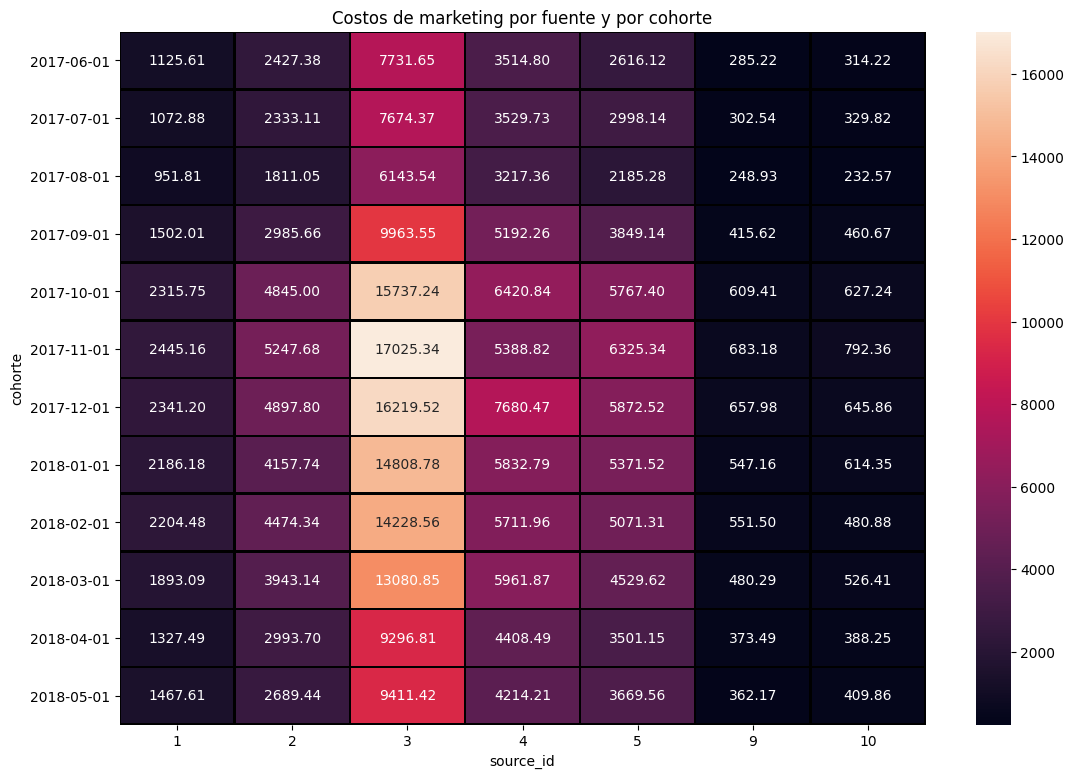

In [59]:
#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(costs_cohorte_fuente_pivot, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.title('Costos de marketing por fuente y por cohorte')
plt.show()

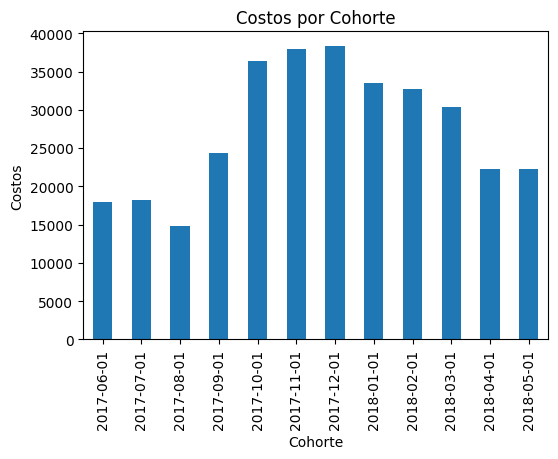

In [60]:
#Graficamos los costos por Cohorte
plt.figure(figsize=(6, 4))
costs_cohorte_fuente_pivot.sum(axis=1).plot(kind='bar')
plt.title('Costos por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Costos')
plt.show()

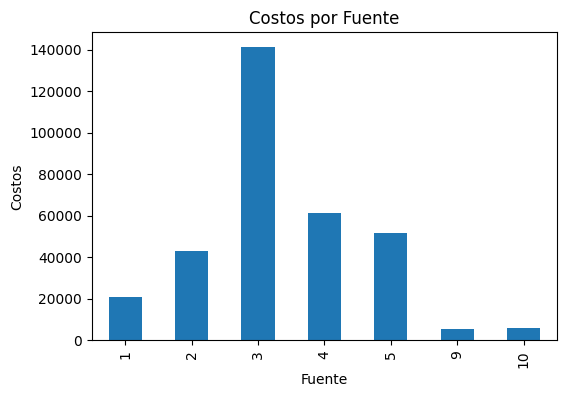

In [61]:
#Graficamos los costos por fuente
plt.figure(figsize=(6, 4))
costs_cohorte_fuente_pivot.sum(axis=0).plot(kind='bar')
plt.title('Costos por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Costos')
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [62]:
first_orders_source = pd.merge(
    first_order,
    first_visit[['Uid', 'Source Id']],
    on = 'Uid').rename(columns={'Source Id': 'source_id'})

first_orders_source.head()

,Buy Ts,Revenue,Uid,day,week,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01,3


In [63]:
#Encontramos la adquisición diaria uniendo las tablas anteriores
daily_adq = (
    first_orders_source
    .groupby(['source_id', 'day'])['Uid']
    .nunique()
    .reset_index()).rename(columns={'Uid': 'new_users'})

In [64]:
#Calculamos el cac por día
daily_cac = pd.merge(daily_cost, daily_adq, on=['day', 'source_id'])

daily_cac['cac'] = daily_cac['costs'] / daily_cac['new_users']

#Calculamos el promedio por usuario por fuente

CAC_fuente = daily_cac.groupby('source_id')['cac'].mean().reset_index()

CAC_fuente

,source_id,cac
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


#### ¿Cuán rentables eran las inversiones? (ROMI)

In [65]:
#Calculamos el LTV por fuente:
LTV_fuente = data.sum(axis=0)
LTV_fuente = LTV_fuente.reset_index()
LTV_fuente.columns = ['source_id', 'total_revenue']


LTV_fuente

,source_id,total_revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [66]:
data_fuente = pd.merge(LTV_fuente, CAC_fuente, on='source_id').rename(columns={'total_revenue':'LTV'})
data_fuente

,source_id,LTV,cac
0,1,31090.55,9.489732
1,2,46923.61,16.287024
2,3,54511.24,15.580474
3,4,56696.83,7.271743
4,5,52624.02,8.336731
5,9,5759.40,6.842532
6,10,4450.33,6.555415


In [67]:
data_fuente['ROMI'] = LTV_fuente['total_revenue'] / CAC_fuente['cac']

data_fuente

,source_id,LTV,cac,ROMI
0,1,31090.55,9.489732,3276.230734
1,2,46923.61,16.287024,2881.042683
2,3,54511.24,15.580474,3498.689359
3,4,56696.83,7.271743,7796.869591
4,5,52624.02,8.336731,6312.308970
5,9,5759.40,6.842532,0.178297
6,10,4450.33,6.555415,878.571382


<Figure size 600x400 with 0 Axes>

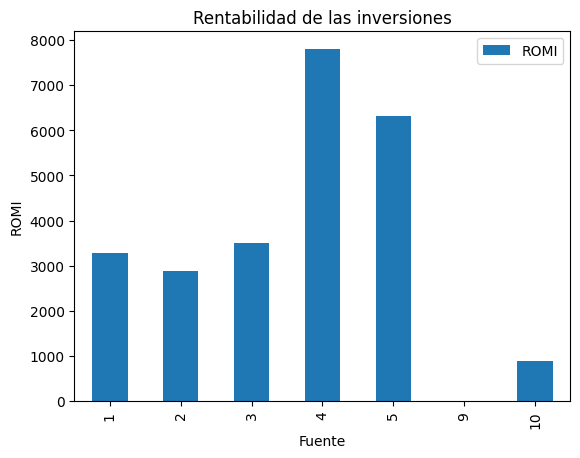

In [68]:
#Graficamos el romi
#Graficamos los costos por Cohorte
plt.figure(figsize=(6, 4))
data_fuente.plot(x='source_id', y='ROMI', kind='bar', title='Rentabilidad de las inversiones')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.show()

## Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

### ¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? 

Recomendaría continuar con la plataformas de anuncios cuyo id son 4 y 5, ya que son los que han generado mayor retorno de inversión en comparación co el resto. Al igual que recomendaría no seguir invirtiendo en las fuentes 9 y 10 ya que no generan ganancias significativas. Esto es visible mediante la gráfica del ROMI. Igualmente respecto al revenue se observan que los mayores ingresos provienen de estas fuentes por los que su costo está justificado.

### ¿Qué conclusiones sacaste después de encontrar los valores métricos?

En general se observa que el LVT es mayor que el cac por lo que es un negocio rentable. El análisis de cohorte permite observar que hay mayores ingresos a finales de año, ya que estos usuarios fueron los que generaron mayores ganancias. 
Los pasos siguientes pueden recaer en invertir mayores cantidades en aquellos anuncios cuyos id son 4 y 5 ya que demostraron tener mayor tasa de retención y c